# Section 1 - Quantifying the association of a feature with an outcome

### Before you begin
* Remember - [download the background & theory packet](https://drive.google.com/file/d/1sOxAyo2lRvEjULoF53rvWa9uz6nlysDN/view?usp=drive_link) accompanying this training 

## Example 1.2

* Now, let's do an example together following Steps 0-4

**Application 1.2**: We hypothesize that, because proteins containing native entanglements are more likely to misfold, they are also more likely to be linked with disease than proteins lacking native entanglements.

* One way to test this hypothesis is to once again create a 2 x 2 contingency table, compute the odds ratio, and then use Fisher's Exact Test to compute a *p*-value
* We need information on proteins that contain native entanglements as well as information on which proteins are implicated in disease

### Step 0 - Load libraries
* Run the below code cell to load all of the libraries needed for the subsequent analysis

In [6]:
import numpy as np
import pandas as pd
from scipy.stats import fisher_exact
import matplotlib.pyplot as plt

### Step 1 - Load the data

* One of the provided data files includes entanglement status and the proteins linked with disease in humans in a readily usable form
* The entanglement status for human proteins was determined by analyzing AlphaFold protein structure predictions; proteins with low-quality predictions were eliminated from the analysis
* Links between proteins and disease were determined using the database DISGENET (https://disgenet.com/)

In [7]:
# "data2" is a pandas DataFrame object
data_path = "/home/jovyan/data-store/data/iplant/home/shared/NCEMS/BPS-training-2025/"
data2     = pd.read_csv(data_path+"entanglement-disease-association.csv")

### Step 2 - Explore the data

* We will once again run a few simple commands to explore the data

In [8]:
# first, print a quick summary
print ("Create a quick summary of the DataFrame:\n")
data2.info()

# second, print the first 10 rows of data2
print ("\nPrint the first 10 rows of the DataFrame:\n")
display(data2.head(10))

# third, check to see if all rows correspond to a unique gene identifier
N_unique = len(data2["gene"].unique())
print ("The number of unique gene IDs is:", N_unique)

Create a quick summary of the DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5366 entries, 0 to 5365
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gene            5366 non-null   object
 1   entanglement    5366 non-null   object
 2   disease-linked  5366 non-null   object
dtypes: object(3)
memory usage: 125.9+ KB

Print the first 10 rows of the DataFrame:



,gene,entanglement,disease-linked
0,A0A0G2JMH6,Yes,Yes
1,P01903,Yes,Yes
2,A0AVF1,No,Yes
3,A0PK11,No,Yes
4,A0AVT1,Yes,No
5,A0PJX2,Yes,No
6,A0PK00,No,No
7,A4D126,Yes,Yes
8,A1L188,No,Yes
9,A2RU14,No,Yes


The number of unique gene IDs is: 5366


* We can see from these results that there are 5,366 rows in the table and all of the entries in all columns have values (i.e., there are no `NaN` entries)
* We can also see that there are no duplicate rows - the number of unique values in the column `gene` is equal to the number of rows in `data2`

### Step 3 - Run the analysis

* Now that we have loaded and examined our data, we are ready to carry out the analysis of the association
* Take a minute to think about what your contingency table will look like; what will the rows and columns represent? When you have your answer, run the below code cell to see a sketch of the contingency table for this hypothesis

This is our (blank) contingency table:



<Figure size 640x480 with 0 Axes>

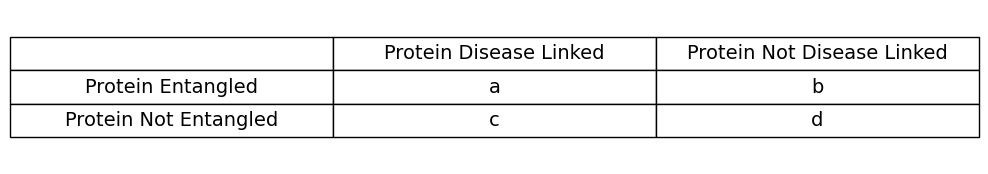

In [9]:
# print a blank contingency table in the format needed for this hypothesis
contingency_table = pd.DataFrame({"Protein Disease Linked"    : ["a", "c"], 
                                  "Protein Not Disease Linked": ["b", "d"]},
                                  index = ["Protein Entangled", "Protein Not Entangled"])

# print the output
print ("This is our (blank) contingency table:\n")

# create a table from our contingency_table using matplotlib
plt.clf()
fig, ax    = plt.subplots(figsize = (5, 2))
ax.axis("tight")
ax.axis("off")
cell_text  = contingency_table.reset_index().values.tolist()
col_labels = [""] + contingency_table.columns.tolist()
table      = ax.table(cellText=cell_text, colLabels=col_labels, loc="center", cellLoc="center")
table.auto_set_font_size(False)
table.set_fontsize(14)  
table.scale(2.5, 2)  
plt.show()

* As in **Example 1.1**, we now need to compute the values of {a, b, c, d), insert them into a DataFrame, and run the `fisher_exact` function from `scipy.stats` to compute the odds ratio and *p*-value

This is our contingency table:



<Figure size 640x480 with 0 Axes>

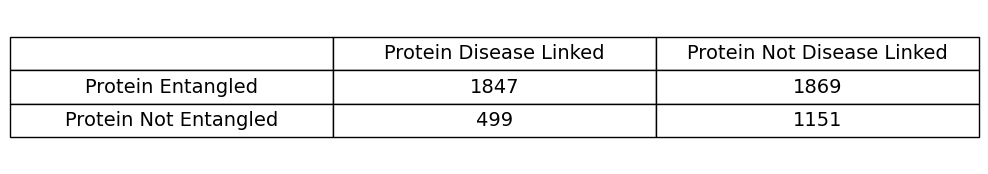

The odds ratio is: 2.28
The p-value is   : 6.46e-41


In [10]:
# compute the values of {a, b, c, d} and construct the contingency table
a = len(data2[(data2["entanglement"] == "Yes" ) & (data2["disease-linked"] == "Yes")])
b = len(data2[(data2["entanglement"] == "Yes" ) & (data2["disease-linked"] == "No")])
c = len(data2[(data2["entanglement"] == "No"  ) & (data2["disease-linked"] == "Yes")])
d = len(data2[(data2["entanglement"] == "No"  ) & (data2["disease-linked"] == "No")])

# create the contingency table as a pandas DataFrame object
contingency_table = pd.DataFrame({"Protein Disease Linked"    : [a, c], 
                                  "Protein Not Disease Linked": [b, d]},
                                 index = ["Protein Entangled", "Protein Not Entangled"])

# print the contingency table
print ("This is our contingency table:\n")

# create a table from our contingency_table using matplotlib
plt.clf()
fig, ax    = plt.subplots(figsize = (5, 2))
ax.axis("tight")
ax.axis("off")
cell_text  = contingency_table.reset_index().values.tolist()
col_labels = [""] + contingency_table.columns.tolist()
table      = ax.table(cellText=cell_text, colLabels=col_labels, loc="center", cellLoc="center")
table.auto_set_font_size(False)
table.set_fontsize(14)  
table.scale(2.5, 2)  
plt.show()

# use the fisher_exact function from scipy.stats to compute the odds ratio and p-value
odds_ratio, fisher_p_value = fisher_exact(contingency_table, alternative = 'two-sided')

print ("The odds ratio is:", '%.2f' %odds_ratio)
print ("The p-value is   :", '%.2e' %fisher_p_value)

### Step 4 - Interpret the results

* Use the quiz question at the QR code/link below to test your understanding

![](../images/section-1-example-2.png)

[Quiz Link](https://forms.gle/3YNqSwi7rR1b2AyT7)